<a href="https://colab.research.google.com/github/I-Love-Ducks/Data-science/blob/main/Arhaan_Matplotlib_Image_Processing_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PLEASE MAKE A COPY

#Simple Graphs with matplotlib

##Learning

Matplotlib abbreviation is plt

In [2]:
pip install matplotlib

In [3]:
import matplotlib.pyplot as plt # dont forget .pyplot!!!!
import numpy as np

Some data:

In [4]:
arr = np.array([3, 2, 6, 4, 7, 2, 4, 6, 9, 6])

To plot it, use .plot()

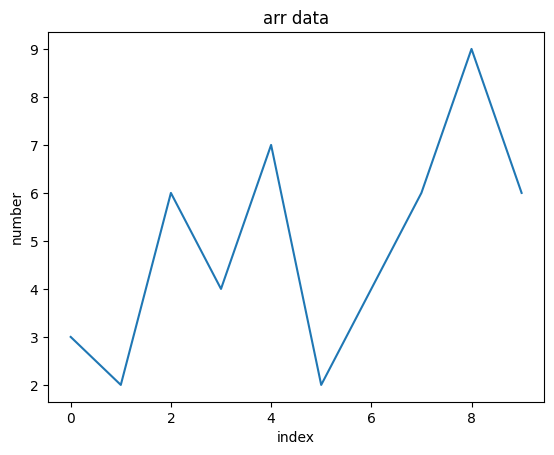

In [5]:
plt.plot(arr)
plt.title("arr data")
plt.xlabel("index")
plt.ylabel("number")
plt.show()

The figure below shows all of the different attributes of a plot:

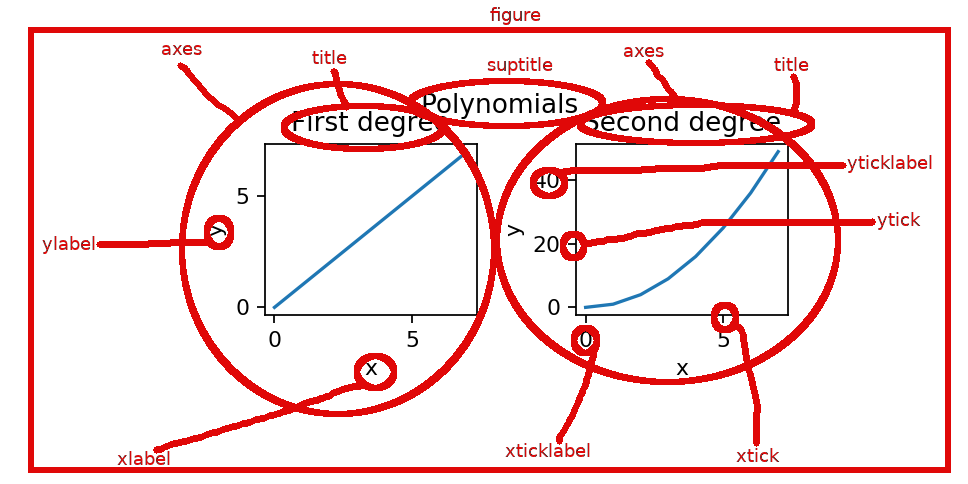



---



Subplots means having a lot of plots in the same figure. To make this, we use `fig, ax = plt.subplots(width, height)`, where fig is the figure and ax is the array of plots. This means, to change one plot, we must specify which plot we are modifiying using `ax[Xindex, Yindex].plot(arr)`

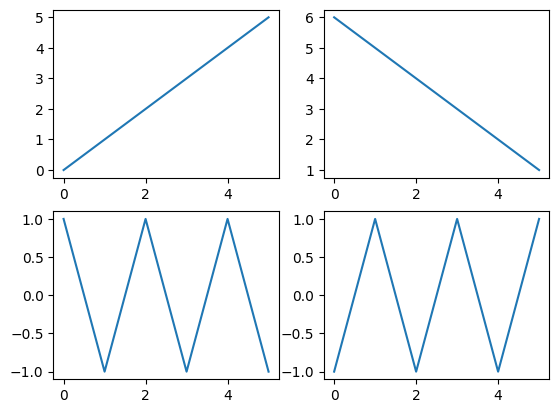

In [6]:
fig, ax = plt.subplots(2,2) # makes subplots in a 2x2 grids

# top left
ax[0,0].plot(np.arange(6)) # plotting from 0 to 6, (0, 1, 2, 3, 4, 5, 6)

# top right
ax[0,1].plot(np.arange(6,0,-1)) # plotting 6 to 0 in decrements of -1

# bottom left
ax[1,0].plot((-1)**np.arange(6)) # plotting -1^n, where n is the range from 0 to 6

# bottom right
ax[1,1].plot((-1)**np.arange(1,7)) # plotting -1^n, where n is the range from 1 to 7

plt.show()

##Exercises

###Multiple graphs

Exercise 3.9 (multiple graphs)

Make your main function plot the following two graphs in one axes. The first graphs has x coordinates 2,4,6,7 and y coordinates 4,3,5,1. The second graph has x coordinates 1,2,3,4 and y coordinates 4,2,3,1.

Add also a title and some labels for x axis and y axis.

####Answer

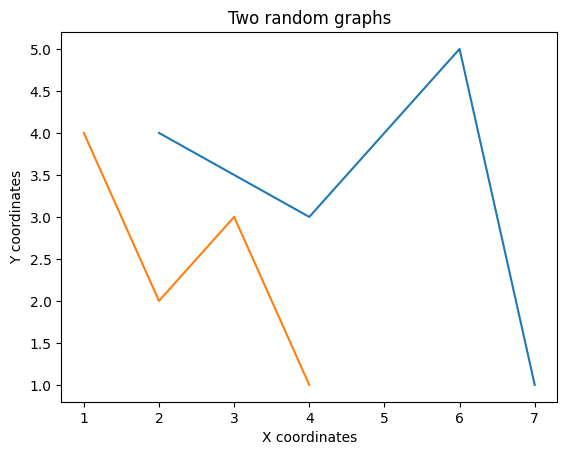

In [7]:
xgraph1 = [2,4,6,7]
ygraph1 = [4,3,5,1]

xgraph2 = [1,2,3,4]
ygraph2 = [4,2,3,1]

plt.plot(xgraph1, ygraph1)
plt.plot(xgraph2, ygraph2)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.title("Two random graphs")

plt.show()

Answer(Select to see):

‎

<font color = "white">xgraph1 = [2,4,6,7]</font>

<font color = "white">ygraph1 = [4,3,5,1]</font>

<font color = "white">xgraph2 = [1,2,3,4]</font>

<font color = "white">ygraph2 = [4,2,3,1]</font>

‎

<font color = "white">plt.plot(xgraph1, ygraph1)</font>

<font color = "white">plt.plot(xgraph2, ygraph2)</font>

<font color = "white">plt.xlabel("X coordinates")</font>

<font color = "white">plt.ylabel("Y coordinates")</font>

<font color = "white">plt.title("Two random graphs")</font>

‎

<font color = "white">plt.show()</font>

---



#Image processing with matplotlib

To display an image into matplotlib, you can use the `plt.imread("painting.png")`

(4500, 4500, 3)
The image consists of 20250000 pixels


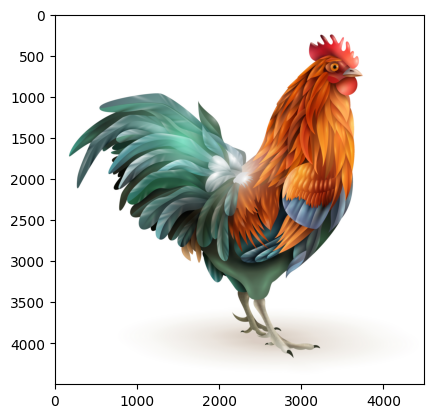

In [19]:
#for this code to work, please download an image and put in the file directory. I connected mine to drive, but you can use other methods

painting=plt.imread("/content/drive/MyDrive/Colab Notebooks/Data science/Images/chicken.jpg")
print(painting.shape)
print(f"The image consists of {painting.shape[0] * painting.shape[1]} pixels")
plt.imshow(painting);

In [20]:
def fadex(image):
    height, width = image.shape[:2]
    m=np.linspace(0,1, width).reshape(1,width,1)
    result = image*m         # this is broadcasting, explained here https://numpy.org/doc/stable/user/basics.broadcasting.html
    return result

In [22]:
def fadex(image):
    height, width = image.shape[:2]
    m=np.linspace(0,0.008, width).reshape(1,width,1) # the range (0,0.008) might differ for different images. Please tweak it

    result = image*m         # note that we rely on broadcasting here
    return result

In [21]:
m=np.linspace(0,1, 5).reshape(1,5,1) # a representation of m in fadex to further understand
print(m)

[[[0.  ]
  [0.25]
  [0.5 ]
  [0.75]
  [1.  ]]]


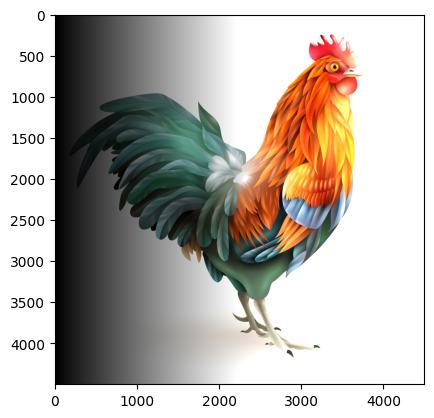

In [23]:
mod = fadex(painting)
plt.imshow(mod)

[[172  47 117 192  67 251 195 103   9 211  21 242  36  87  70 216  88 140
   58 193 230  39  87 174  88]
 [ 81 165  25  77  72   9 148 115 208 243 197 254  79 175 192  82  99 216
  177 243  29 147 147 142 167]]


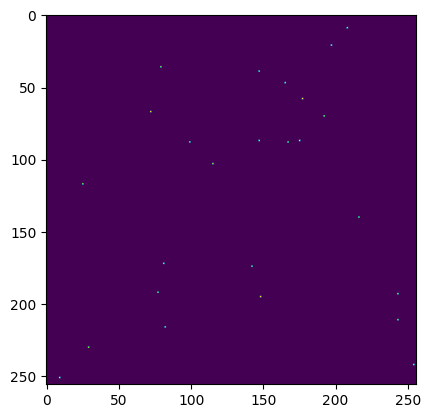

In [24]:
n=5
l=256 # side length of picture

im = np.zeros((l,l))

np.random.seed(0)

# creating an array with two arrays in it, one with x and one with y
points = np.random.randint(0, l, (2, n**2))
print(points) # look at output to understand further

# each number in points[0] array is matched with the same index in points[1] to make a dot
im[points[0], points[1]] = 1

plt.imshow(im);

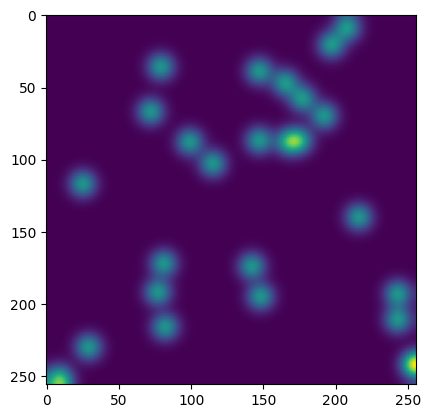

In [25]:
from scipy import ndimage

im2 = ndimage.gaussian_filter(im, sigma=l/(8.*n))  # blur the image a bit
# sigma is the amount of blurring

plt.imshow(im2);

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
Number of clusters is 12


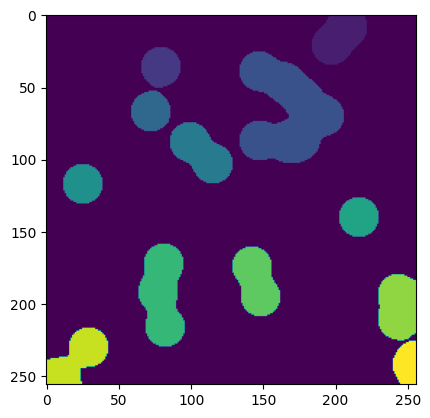

In [26]:
# using blurred image
mask = im2 > im2.mean()     # mask those pixels whose intensity is above mean
# The above code is an array of False and True's
print(mask)


label_im, nb_labels = ndimage.label(mask)   # connected components form clusters
# LOOK AT CELL BELOW FOR EXPLANATION ON ABOVE LINE


print(f"Number of clusters is {nb_labels}")
plt.imshow(label_im)

**EXPLANATION FOR ABOVE LINE: label_im, nb_labels = ndimage.label(mask)**

nb_labels is how many "objects" or clusters are found, and label_im is an image

which assigns each cluster a number

 Ex:

```
mask = [[1,1,0],

         [0,0,1],
         
         [1,1,0]]

 label_im, nb_labels = ndimage.label(mask)

```
Result:
```
 nb_labels = 3

 label_im = [[1,1,0],

             [0,0,2],

             [3,3,0]]
```



For more info on ndimage.mask: [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html)



---



Although this method we used was very simple, it could still be used for example to automatically count number of birds or stars in an image. Of course, humans can do this easily, but when there are hundreds or thousands of images, then it is better to use machines to do this mechanical work.

There is large number of applications of image processing of which we list only a few here:

* denoising
* deblurring
* image segmentation
* feature extraction
* zooming, rotating
* filtering







##Exercises

For exercises, go to the link and scroll to find them: [Click](https://courses.mooc.fi/org/uh-cs/courses/dap-22/chapter-3/image-processing)

##Additional libraries
The are several libraries written in Python that allow easy processing of images.

Few examples of these:

pillow

scikit-image

In Scipy there is the subpackage ndimage that also contains routines for processing images